In [3]:
import pandas as pd

In [169]:
df=pd.read_csv("수정_고객DB.csv",encoding="cp949")

In [170]:
df.head(1)

,연번,이름 (Name),생년월일 (Date of Birth),성별 (Gender),휴대폰번호 (Phone Number),이메일 (Email),주소 (Address),아이디 (User ID),가입일 (Registration Date),고객 세그먼트 (Customer Segment),차량구분(vehicle types),구매한 제품 (Purchased Product),제품 구매 날짜 (Purchase Date),거래 금액 (Transaction Amount),거래 방식 (Transaction Method),제품 구매 빈도 (Purchase Frequency),제품 구매 경로 (Purchase Path),연령대
0,1,강주온,2002-03-04,남,010-6502-8753,janisi@himedia.co.kr,인천광역시 남동구 구월동 88-10,14798,2023-04-01,일반,준중형 세단,Avante (CN7 N),2024-04-04,35170000,카드,1,오프라인,23


In [171]:
launch_dates = {
    'G70 (IK)': '2017-09',
    'Santa-Fe ™': '2018-01',  # 첫 출시
    'NEXO (FE)': '2018-01',
    'Avante (CN7 N)': '2020-05',
    'G80 (RG3)': '2020-03',
    'Grandeur (GN7 HEV)': '2022-01',
    'IONIQ (AE EV)': '2016-01',
    'i30 (PD)': '2017-03',
    'Palisade (LX2)': '2018-12',
    'Tucson (NX4 PHEV)': '2021-05',
    'Avante (CN7 HEV)': '2020-07',
    'IONIQ 6 (CE)': '2022-06',
    'G90 (HI)': '2022-03',
    'Santa-Fe (MX5 PHEV)': '2022-06',
    'G90 (RS4)': '2022-03'
}
# '구매한 제품 (Purchased Product)'에 따라 출시 년월 컬럼 추가
df['제품 출시년월 (Launch Date)'] = df['구매한 제품 (Purchased Product)'].map(launch_dates)

In [172]:
df.head(1)

,연번,이름 (Name),생년월일 (Date of Birth),성별 (Gender),휴대폰번호 (Phone Number),이메일 (Email),주소 (Address),아이디 (User ID),가입일 (Registration Date),고객 세그먼트 (Customer Segment),차량구분(vehicle types),구매한 제품 (Purchased Product),제품 구매 날짜 (Purchase Date),거래 금액 (Transaction Amount),거래 방식 (Transaction Method),제품 구매 빈도 (Purchase Frequency),제품 구매 경로 (Purchase Path),연령대,제품 출시년월 (Launch Date)
0,1,강주온,2002-03-04,남,010-6502-8753,janisi@himedia.co.kr,인천광역시 남동구 구월동 88-10,14798,2023-04-01,일반,준중형 세단,Avante (CN7 N),2024-04-04,35170000,카드,1,오프라인,23,2020-05


In [173]:
df.to_csv("고객데이테수정.csv", index=False)

In [174]:
car_features=["성별 (Gender)","차량구분(vehicle types)","거래 방식 (Transaction Method)","제품 출시년월 (Launch Date)"]

In [175]:
num_features=["연령대","거래 금액 (Transaction Amount)","제품 구매 빈도 (Purchase Frequency)"]

In [176]:
df=df.drop(columns="고객 세그먼트 (Customer Segment)")

In [177]:
df.head(1)

,연번,이름 (Name),생년월일 (Date of Birth),성별 (Gender),휴대폰번호 (Phone Number),이메일 (Email),주소 (Address),아이디 (User ID),가입일 (Registration Date),차량구분(vehicle types),구매한 제품 (Purchased Product),제품 구매 날짜 (Purchase Date),거래 금액 (Transaction Amount),거래 방식 (Transaction Method),제품 구매 빈도 (Purchase Frequency),제품 구매 경로 (Purchase Path),연령대,제품 출시년월 (Launch Date)
0,1,강주온,2002-03-04,남,010-6502-8753,janisi@himedia.co.kr,인천광역시 남동구 구월동 88-10,14798,2023-04-01,준중형 세단,Avante (CN7 N),2024-04-04,35170000,카드,1,오프라인,23,2020-05


In [178]:
car_features=["성별 (Gender)","차량구분(vehicle types)","거래 방식 (Transaction Method)","제품 출시년월 (Launch Date)","제품 구매 날짜 (Purchase Date)"]

In [179]:
num_features=["연령대","거래 금액 (Transaction Amount)","제품 구매 빈도 (Purchase Frequency)"]

In [180]:
car_features

['성별 (Gender)',
 '차량구분(vehicle types)',
 '거래 방식 (Transaction Method)',
 '제품 출시년월 (Launch Date)',
 '제품 구매 날짜 (Purchase Date)']

In [182]:
num_features

['연령대', '거래 금액 (Transaction Amount)', '제품 구매 빈도 (Purchase Frequency)']

In [183]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), car_features)
    ])

In [184]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(random_state=42))
])

In [185]:
def calculate_wcss(pipeline, X, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        pipeline.set_params(kmeans__n_clusters=i)
        pipeline.fit(X)
        wcss.append(pipeline.named_steps['kmeans'].inertia_)
    return wcss

In [186]:
X = df[num_features+car_features]

In [188]:
X

,연령대,거래 금액 (Transaction Amount),제품 구매 빈도 (Purchase Frequency),성별 (Gender),차량구분(vehicle types),거래 방식 (Transaction Method),제품 출시년월 (Launch Date),제품 구매 날짜 (Purchase Date)
0,23,35170000,1,남,준중형 세단,카드,2020-05,2024-04-04
1,42,85790000,5,남,준대형 세단,카드,2020-03,2025-02-10
2,26,69500000,1,여,중형 suv,현금,2018-01,2025-03-10
3,65,34920000,1,남,중형 suv,현금,2018-01,2023-05-01
4,55,50230000,1,남,중형 세단,카드,2017-09,2023-10-01
...,...,...,...,...,...,...,...,...
287,67,86770000,2,여,준중형 세단,카드,2020-03,2024-12-20
288,49,69510000,3,여,준대형 세단,현금,2020-05,2023-08-24
289,57,39890000,2,여,준대형 세단,현금,2018-01,2024-01-12
290,41,44530000,2,남,소형 해치백,현금,2020-03,2024-01-30


In [189]:
wcss = calculate_wcss(pipeline, X)

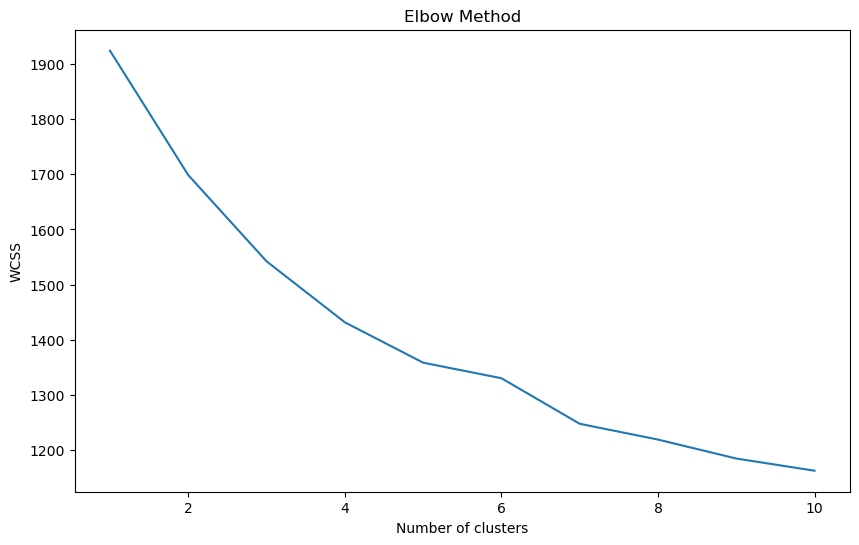

In [190]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(wcss) + 1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [197]:
optimal_clusters = 9

In [198]:
pipeline.set_params(kmeans__n_clusters=optimal_clusters)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['연령대',
                                                   '거래 금액 (Transaction Amount)',
                                                   '제품 구매 빈도 (Purchase '
                                                   'Frequency)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['성별 (Gender)',
                                                   '차량구분(vehicle types)',
                                                   '거래 방식 (Transaction Method)',
                                                   '제품 출시년월 (Launch Date)',
                                                   '제품 구매 날짜 (Purchase '
                                                   'Date)'])])),
                ('kmeans', KMeans(n_clusters=9, random_state=42))])

In [199]:
df['Cluster'] = pipeline.fit_predict(X)

In [200]:
df

,연번,이름 (Name),생년월일 (Date of Birth),성별 (Gender),휴대폰번호 (Phone Number),이메일 (Email),주소 (Address),아이디 (User ID),가입일 (Registration Date),차량구분(vehicle types),구매한 제품 (Purchased Product),제품 구매 날짜 (Purchase Date),거래 금액 (Transaction Amount),거래 방식 (Transaction Method),제품 구매 빈도 (Purchase Frequency),제품 구매 경로 (Purchase Path),연령대,제품 출시년월 (Launch Date),Cluster
0,1,강주온,2002-03-04,남,010-6502-8753,janisi@himedia.co.kr,인천광역시 남동구 구월동 88-10,14798,2023-04-01,준중형 세단,Avante (CN7 N),2024-04-04,35170000,카드,1,오프라인,23,2020-05,8
1,2,김경수,1983-01-02,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,광주광역시 서구 치평동 14-7,kyoungsoo031,2025-02-09,준대형 세단,G80 (RG3),2025-02-10,85790000,카드,5,오프라인,42,2020-03,3
2,3,김다은,1999-05-02,여,010-6789-0123,kimdaeun26@himedia.co.kr,부산광역시 해운대구 우동 101-12,daeun026,2025-02-28,중형 suv,NEXO (FE),2025-03-10,69500000,현금,1,오프라인,26,2018-01,7
3,4,김민수,1960-07-01,남,010-1234-5678,kimminsu1@himedia.co.kr,전라남도 목포시 부주동 77-8,minsu001,2023-04-28,중형 suv,Santa-Fe ™,2023-05-01,34920000,현금,1,오프라인,65,2018-01,6
4,5,김승현,1970-03-02,남,010-0123-4567,kimseunghyun20@himedia.co.kr,경기도 수원시 영통구 원천동 12-34,seunghyun020,2023-09-18,중형 세단,G70 (IK),2023-10-01,50230000,카드,1,오프라인,55,2017-09,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,신시우,1958-07-11,여,042-207-6955,gyeonghyi78@gmail.com,전라북도 전주시 완산구 덕진동 33-7,jihungim,2023-03-06,준중형 세단,G80 (RG3),2024-12-20,86770000,카드,2,온라인,67,2020-03,4
288,289,최춘자,1976-06-27,여,031-170-7739,hancunja@yu.kr,충청남도 천안시 동남구 성성동 22-3,jinho50,2024-08-26,준대형 세단,Avante (CN7 N),2023-08-24,69510000,현금,3,오프라인,49,2020-05,0
289,290,차서준,1968-01-22,여,064-741-3740,qgim@simryujo.com,경상남도 창원시 의창구 봉곡동 48-6,jihun41,2023-01-02,준대형 세단,NEXO (FE),2024-01-12,39890000,현금,2,온라인,57,2018-01,6
290,291,안정희,1984-01-10,남,051-406-1803,donghyeonbae@joyunson.com,대구광역시 수성구 범어동 55-3,yeongil47,2023-04-08,소형 해치백,G80 (RG3),2024-01-30,44530000,현금,2,온라인,41,2020-03,6


In [201]:
df['Cluster'].value_counts()

Cluster
8    46
6    35
7    33
5    32
4    32
0    30
2    30
3    27
1    27
Name: count, dtype: int64

In [202]:
df.to_csv("클러스터링고객데이터.csv",index=False)

In [204]:
df.head(1)

,연번,이름 (Name),생년월일 (Date of Birth),성별 (Gender),휴대폰번호 (Phone Number),이메일 (Email),주소 (Address),아이디 (User ID),가입일 (Registration Date),차량구분(vehicle types),구매한 제품 (Purchased Product),제품 구매 날짜 (Purchase Date),거래 금액 (Transaction Amount),거래 방식 (Transaction Method),제품 구매 빈도 (Purchase Frequency),제품 구매 경로 (Purchase Path),연령대,제품 출시년월 (Launch Date),Cluster
0,1,강주온,2002-03-04,남,010-6502-8753,janisi@himedia.co.kr,인천광역시 남동구 구월동 88-10,14798,2023-04-01,준중형 세단,Avante (CN7 N),2024-04-04,35170000,카드,1,오프라인,23,2020-05,8
